# INLP Group Work HS2022

This document describes the group work aspect of the INLP module. We provide descriptions and code samples of the planned tasks.

Please fill in details where explicitly indicated and leave everything else intact.

Group ID: 6

Group members: Alina Meyer

## Task

| Name            | Split (Train/Test/Validation) |       Type |
|-----------------|:-----------------------------:|-----------:|
| emotion         | 3257/1421/374                 | Quaternary |
| hate            | 9000/2970/1000                |     Binary |
| irony           | 2862/784/955                  |     Binary |
| offensive       | 11916/860/1324                |     Binary |
| sentiment       | 45615/12284/2000              |    Ternary |
| stance_abortion | 587/280/66                    |    Ternary |
| stance_atheism  | 461/220/52                    |    Ternary |
| stance_climate  | 355/169/40                    |    Ternary |
| stance_feminism | 597/285/67                    |    Ternary |
| stance_hillary  | 620/295/69                    |    Ternary |

Following the same approaches presented in the module, solve the current tasks:

1. Envision an NLP application using one or more of the data sets described in the table above
2. Implement your solution in a Jupyter Notebook
3. Document it using the provided Canvas document (that will guide you in the required aspects)
4. Present your solution in the final lecture of the module

## Dependencies

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.6/503.6 kB 10.4 MB/s eta 0:00:0031m10.9 MB/s eta 0:00:01
  Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.8 MB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 37.1 MB/s eta 0:00:00
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 MB 19.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.2/193.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 51.5 MB

In [102]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 32.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 17.3 MB/s eta 0:00:00
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.3 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.5 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Data loading

This section provides starter code for loading all the data

In [2]:
import datasets

# NOTE: this block loads all the available data into a dictionary
# use the keys of the dictionary to access the required data set
all_data = {}
names = ["emotion", "hate", "irony",
         "offensive", "sentiment", "stance_abortion",
         "stance_atheism", "stance_climate", "stance_feminist",
         "stance_hillary"]
for name in names:
    all_data[name] = datasets.load_dataset("tweet_eval", name)

In [3]:
all_data.keys()

dict_keys(['emotion', 'hate', 'irony', 'offensive', 'sentiment', 'stance_abortion', 'stance_atheism', 'stance_climate', 'stance_feminist', 'stance_hillary'])

In [4]:
# print description of the "offensive" data set
print(all_data["offensive"]["train"].info.description)

In [5]:
# print labels available for "offensive" data set (with order)
print(all_data["offensive"]["train"].info.features["label"].names)

['non-offensive', 'offensive']


In [6]:
print(all_data["emotion"]["train"].info.features["label"].names)

['anger', 'joy', 'optimism', 'sadness']


In [7]:
print(all_data["stance_feminist"]["train"].info.features["label"].names)

['none', 'against', 'favor']


In [8]:
print(all_data["sentiment"]["train"].info.features["label"].names)

['negative', 'neutral', 'positive']


In [9]:
# example of a non-offensive tweet
all_data["offensive"]["train"][0]

{'text': '@user Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen.',
 'label': 0}

In [10]:
# example of an offensive tweet
all_data["offensive"]["train"][1]

{'text': '@user Eight years the republicans denied obama’s picks. Breitbarters outrage is as phony as their fake president.',
 'label': 1}

## Implementation

This section describes next steps in your implementation.

In [ ]:
!pip install nltk
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
  Using cached scikit_learn-1.7.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



### Feature extraction/transformation and tokenization

**Fill in** your NLP pipeline in the next blocks.

In [21]:
all_data["stance_feminist"]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 597
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 285
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 67
    })
})

In [25]:
from datasets import concatenate_datasets, DatasetDict

merged_train = concatenate_datasets([all_data["stance_feminist"]['train'], all_data["stance_feminist"]['test']])

feminist_stance = DatasetDict({
    'train': merged_train,
    'validation': all_data["stance_feminist"]['validation']
})

print(feminist_stance)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 882
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 67
    })
})


In [29]:
feminist_stance_train = feminist_stance["train"]
feminist_stance_val = feminist_stance["validation"]

In [30]:
from datasets import concatenate_datasets, DatasetDict

merged_train = concatenate_datasets([all_data["offensive"]['train'], all_data["offensive"]['test']])

offensive = DatasetDict({
    'train': merged_train,
    'validation': all_data["offensive"]['validation']
})

print(offensive)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 12776
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1324
    })
})


In [31]:
offensive_train = offensive["train"]
offensive_val = offensive["validation"]

In [32]:
feminist_stance_train[2]

{'text': 'RT @user Look for our latest indiegogo campaign coming out soon to help turn young girls into great leaders. #womensrights #SemST',
 'label': 2}

In [23]:
import nltk

nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/alina/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [33]:
import re
import string
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk import pos_tag
from nltk.corpus import wordnet

tweet_tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)
lemmatizer = WordNetLemmatizer()

PUNCTUATION_AND_DIGITS = string.punctuation + string.digits

def _get_wordnet_pos(tag):
    """Converts Treebank tags to WordNet Tags"""
    if tag.startswith('J'):  
        return wordnet.ADJ
    elif tag.startswith('V'):  
        return wordnet.VERB
    elif tag.startswith('N'):  
        return wordnet.NOUN
    elif tag.startswith('R'):  
        return wordnet.ADV
    else:
        return wordnet.NOUN


def preprocess_and_clean_text(example):
    text = example['text'] 
    # removes unnecessary "RT @user"
    text = re.sub(r'\brt\s?@?\w*\s*', '', text, flags=re.IGNORECASE)
    # remove urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    tokens = tweet_tokenizer.tokenize(text)

    # keeps: '#something' '@user'
    # removes: '#' '123' '.' '@'
    filtered_tokens = [
        token for token in tokens 
        if not all(c in PUNCTUATION_AND_DIGITS for c in token)
    ]
    
    tagged_tokens = pos_tag(filtered_tokens)
    lemmatized_tokens = []
    for word, tag in tagged_tokens:
        tag = _get_wordnet_pos(tag)
        lemmatized_word = lemmatizer.lemmatize(word, pos=tag)
        lemmatized_tokens.append(lemmatized_word)

    # Do with vectorizer, not everything needs to be done in first step
    # bigrams = list(ngrams(lemmatized_tokens, n=2))
    # bigram_strings = ['_'.join(gram) for gram in bigrams]
    # processed_tokens = lemmatized_tokens + bigram_strings
    
    processed_string = " ".join(lemmatized_tokens)
    return {'processed_text': processed_string}

In [34]:
processed_feminist_stance_train = feminist_stance_train.map(preprocess_and_clean_text)
processed_feminist_stance_validation = feminist_stance_val.map(preprocess_and_clean_text)

Parameter 'function'=<function preprocess_and_clean_text at 0x7fe968ad8b80> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only shown once. Subsequent hashing failures won't be shown.


Map:   0%|          | 0/882 [00:00<?, ? examples/s]

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

In [36]:
processed_offensive_train = offensive_train.map(preprocess_and_clean_text)
processed_offensive_validation = offensive_val.map(preprocess_and_clean_text)

Map:   0%|          | 0/12776 [00:00<?, ? examples/s]

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

In [37]:
processed_offensive_train[0]

{'text': '@user Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen.',
 'label': 0,
 'processed_text': '@user bono who care soon people will understand that they gain nothing from follow a phony celebrity become a leader of your people instead or help and support your fellow countryman'}

### Vocabulary and vector representation

**Fill in** the code for providing the vector representation of your data set(s).

#### TfidfVectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

feminist_stance_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=10000,   # Top 10,000 features for the input layer size: To investiage
    min_df=3,             # Filter out rare noise: To investigate
    max_df=0.9            # Filter out overly common structural phrases: To investigate
)
X_stance_train = feminist_stance_vectorizer.fit_transform(processed_feminist_stance_train['processed_text'])
X_stance_validation = feminist_stance_vectorizer.transform(processed_feminist_stance_validation['processed_text'])

y_stance_train = processed_feminist_stance_train['label']
y_stance_validation = processed_feminist_stance_validation['label']

In [39]:
offensive_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2), 
    max_features=10000, 
    min_df=3,
    max_df=0.9
)
X_offensive_train = offensive_vectorizer.fit_transform(processed_offensive_train['processed_text'])
X_offensive_validation = offensive_vectorizer.transform(processed_offensive_validation['processed_text'])

y_offensive_train = processed_offensive_train['label']
y_offensive_validation = processed_offensive_validation['label']

In [40]:
from sklearn.linear_model import LogisticRegression

model_stance = LogisticRegression(max_iter=2000, class_weight='balanced')
model_stance.fit(X_stance_train, y_stance_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [41]:
model_offensive = LogisticRegression(max_iter=1000)
model_offensive.fit(X_offensive_train, y_offensive_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### Doc2Vec

In [66]:
from gensim.models.doc2vec import TaggedDocument
import gensim

def tag_documents(data, dataset_name):
    # doc.split() converts the processed text string back into a list of unigrams
    tagged = [TaggedDocument(words=doc.split(), tags=[f'{dataset_name}_{i}']) 
              for i, doc in enumerate(data)]
    return tagged

tagged_stance_train = tag_documents(processed_feminist_stance_train['processed_text'], 'stance')
tagged_offensive_train = tag_documents(processed_offensive_train['processed_text'], 'offensive')

In [67]:
VECTOR_SIZE = 300 

model_stance_doc2vec = gensim.models.Doc2Vec(
    vector_size=VECTOR_SIZE,
    min_count=5,          # Ignore words that appear very rarely
    epochs=100,
    dm=0                  # Use the PV-DM (Distributed Memory) model, generally better for classification
)

model_stance_doc2vec.build_vocab(tagged_stance_train)

model_stance_doc2vec.train(
    tagged_stance_train, 
    total_examples=model_stance_doc2vec.corpus_count, 
    epochs=model_stance_doc2vec.epochs
)

In [68]:
VECTOR_SIZE = 300 

model_offensive_doc2vec = gensim.models.Doc2Vec(
    vector_size=VECTOR_SIZE,
    min_count=5,          # Ignore words that appear very rarely
    epochs=100,
    dm=0                  # Use the PV-DM (Distributed Memory) model, generally better for classification
)

model_offensive_doc2vec.build_vocab(tagged_offensive_train)

model_offensive_doc2vec.train(
    tagged_offensive_train, 
    total_examples=model_offensive_doc2vec.corpus_count, 
    epochs=model_offensive_doc2vec.epochs
)

In [70]:
def infer_vectors(model, data):
    # This uses the trained Doc2Vec model to infer a vector for each post
    return [model.infer_vector(doc.split()) for doc in data]

# Stance features (300 dense dimensions per post)
X_stance_doc2vec_train = infer_vectors(model_stance_doc2vec, processed_feminist_stance_train['processed_text'])
X_stance_doc2vec_validation = infer_vectors(model_stance_doc2vec, processed_feminist_stance_validation['processed_text'])

X_offensive_doc2vec_train = infer_vectors(model_offensive_doc2vec, processed_offensive_train['processed_text'])
X_offensive_doc2vec_validation = infer_vectors(model_offensive_doc2vec, processed_offensive_validation['processed_text'])

In [71]:
from sklearn.linear_model import LogisticRegression

model_stance_doc2vec_lr = LogisticRegroffensive_vectorizeression(
    max_iter=1000, 
    class_weight='balanced'
)

model_stance_doc2vec_lr.fit(X_stance_doc2vec_train, processed_feminist_stance_train['label'])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [72]:
from sklearn.linear_model import LogisticRegression

model_offensive_doc2vec_lr = LogisticRegression(
    max_iter=1000, 
    class_weight='balanced'
)

model_offensive_doc2vec_lr.fit(X_offensive_doc2vec_train, processed_offensive_train['label'])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Evaluation (traditional ML)

**Fill in** the code for evaluating your NLP pipeline.

In [49]:
def analyze_discourse(
    text, 
    feminist_model, 
    offensive_model, 
    stance_feature_type='doc2vec', 
    offensive_feature_type='tfidf'
):
    
    try:
        processed_text = text['processed_text']
    except (TypeError, KeyError):
        processed_text = preprocess_and_clean_text({'text': text})['processed_text']
        
    if stance_feature_type == 'doc2vec':
        token_list = processed_text.split()
        vector_stance = model_stance_doc2vec.infer_vector(token_list)
        vector_stance_input = vector_stance.reshape(1, -1) 
    
    elif stance_feature_type == 'tfidf':
        vector_stance_input = feminist_stance_vectorizer.transform([processed_text])
    
    else:
        raise ValueError("Invalid stance_feature_type. Must be 'doc2vec' or 'tfidf'.")
        
    stance_prediction = feminist_model.predict(vector_stance_input)[0]
    
    if offensive_feature_type == 'tfidf':
        vector_offensive_input = offensive_vectorizer.transform([processed_text])
        
    elif offensive_feature_type == 'doc2vec':
        token_list = processed_text.split()
        vector_offensive = model_offensive_doc2vec.infer_vector(token_list)
        vector_offensive_input = vector_offensive.reshape(1, -1)
    
    else:
        raise ValueError("Invalid offensive_feature_type. Must be 'doc2vec' or 'tfidf'.")
        
    offensive_prediction = offensive_model.predict(vector_offensive_input)[0]
    
    return {
        "text": text,
        "stance_prediction": stance_prediction,
        "offensive_prediction": offensive_prediction
    }

#### TFIDF

In [50]:
analyze_discourse("Feminism is a plague on society.", model_stance, model_offensive,stance_feature_type="tfidf", offensive_feature_type="tfidf")

{'text': 'Feminism is a plague on society.',
 'stance_prediction': np.int64(1),
 'offensive_prediction': np.int64(0)}

In [51]:
analyze_discourse("Feminism is a good thing.", model_stance, model_offensive, stance_feature_type="tfidf", offensive_feature_type="tfidf")

{'text': 'Feminism is a good thing.',
 'stance_prediction': np.int64(1),
 'offensive_prediction': np.int64(0)}

In [52]:
analyze_discourse("fuck women", model_stance, model_offensive, stance_feature_type="tfidf", offensive_feature_type="tfidf")

{'text': 'fuck women',
 'stance_prediction': np.int64(2),
 'offensive_prediction': np.int64(1)}

In [53]:
analyze_discourse("just had toast", model_stance, model_offensive, stance_feature_type="tfidf", offensive_feature_type="tfidf")

{'text': 'just had toast',
 'stance_prediction': np.int64(2),
 'offensive_prediction': np.int64(0)}

In [54]:
analyze_discourse("i hate all you idiots of you", model_stance, model_offensive, stance_feature_type="tfidf", offensive_feature_type="tfidf")

{'text': 'i hate all you idiots of you',
 'stance_prediction': np.int64(0),
 'offensive_prediction': np.int64(1)}

In [55]:
all_data["stance_feminist"]["train"].info.features["label"].names

['none', 'against', 'favor']

In [56]:
label_none = 0
label_against = 0
label_favor = 0
for tweet in all_data["stance_feminist"]["train"]:
    if tweet["label"] == 0:
        label_none +=1
    if tweet["label"] == 1:
        label_against +=1
    if tweet["label"] == 2:
        label_favor +=1

In [57]:
print(f"No stance: {label_none}, Against: {label_against}, Favor: {label_favor}")

No stance: 113, Against: 295, Favor: 189


#### Mixed models

In [58]:
analyze_discourse("Feminism is a plague on society.", model_stance_doc2vec_lr, model_offensive)

{'text': 'Feminism is a plague on society.',
 'stance_prediction': np.int64(1),
 'offensive_prediction': np.int64(0)}

In [59]:
analyze_discourse("Feminism is a good thing.", model_stance_doc2vec_lr, model_offensive)

{'text': 'Feminism is a good thing.',
 'stance_prediction': np.int64(1),
 'offensive_prediction': np.int64(0)}

In [60]:
analyze_discourse("fuck women", model_stance_doc2vec_lr, model_offensive)

{'text': 'fuck women',
 'stance_prediction': np.int64(1),
 'offensive_prediction': np.int64(1)}

In [61]:
analyze_discourse("i just had toast", model_stance_doc2vec_lr, model_offensive)

{'text': 'i just had toast',
 'stance_prediction': np.int64(0),
 'offensive_prediction': np.int64(0)}

#### Both doc2vec

In [74]:
analyze_discourse("Feminism is a plague on society.", model_stance_doc2vec_lr, model_offensive_doc2vec_lr, offensive_feature_type="doc2vec")

{'text': 'Feminism is a plague on society.',
 'stance_prediction': np.int64(1),
 'offensive_prediction': np.int64(0)}

In [75]:
analyze_discourse("Feminism is a good thing.", model_stance_doc2vec_lr, model_offensive_doc2vec_lr, offensive_feature_type="doc2vec")

{'text': 'Feminism is a good thing.',
 'stance_prediction': np.int64(1),
 'offensive_prediction': np.int64(0)}

In [77]:
analyze_discourse("fuck women", model_stance_doc2vec_lr, model_offensive_doc2vec_lr, offensive_feature_type="doc2vec")

{'text': 'fuck women',
 'stance_prediction': np.int64(1),
 'offensive_prediction': np.int64(1)}

In [79]:
analyze_discourse("i just had toast", model_stance_doc2vec_lr, model_offensive_doc2vec_lr, offensive_feature_type="doc2vec")

{'text': 'i just had toast',
 'stance_prediction': np.int64(0),
 'offensive_prediction': np.int64(0)}

I think the data scarcity is the issue. And the approaches we learned might not be enough here.

#### Create mixed validation dataset

In [81]:
validation_offensive = processed_offensive_train
validation_feminism = processed_feminist_stance_validation

In [83]:
validation_offensive[0]

{'text': '@user Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen.',
 'label': 0,
 'processed_text': '@user bono who care soon people will understand that they gain nothing from follow a phony celebrity become a leader of your people instead or help and support your fellow countryman'}

In [84]:
validation_feminism[0]

{'text': 'I take it personally when people call my dog a he. Toni is a girls name too #SemST',
 'label': 2,
 'processed_text': 'i take it personally when people call my dog a he toni be a girls name too #semst'}

In [86]:
from datasets import concatenate_datasets, Dataset
offensive_subset = validation_offensive.select(range(30))
feminism_subset = validation_feminism.select(range(30))

offensive_subset = offensive_subset.rename_column("label", "offensive_label")
feminism_subset = feminism_subset.rename_column("label", "feminism_label")

placeholders = [None] * 30

offensive_subset = offensive_subset.add_column("feminism_label", placeholders)

feminism_subset = feminism_subset.add_column("offensive_label", placeholders)

cross_label_dataset = concatenate_datasets([offensive_subset, feminism_subset])

print(cross_label_dataset)

Dataset({
    features: ['text', 'offensive_label', 'processed_text', 'feminism_label'],
    num_rows: 60
})


1 against
2 pro
0 neutral

In [87]:
# Labelling will be done manually in a csv file to avoid mistakes
df = cross_label_dataset.to_pandas()
df.to_csv("cross_labeling_task.csv", index=False)

In [92]:
final_validation_set = Dataset.from_csv("cross_labeling_DONE.csv")

print("Example (Row 0):")
print(final_validation_set[0])

Example (Row 0):
{'text': '@user Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen.', 'offensive_label': 0, 'processed_text': '@user bono who care soon people will understand that they gain nothing from follow a phony celebrity become a leader of your people instead or help and support your fellow countryman', 'feminism_label': 0}


In [93]:
# for a close 1/2 split
final_validation_set = final_validation_set.select(range(45))
final_validation_set

Dataset({
    features: ['text', 'offensive_label', 'processed_text', 'feminism_label'],
    num_rows: 45
})

Note: I don't even always agree with the offensive one. With the feminst one I agree more. But also: most from offensvie are not about feministm at all, also, twitter talk is awful and not clear so thats not helping either

#### Evaluate TFIDF

In [97]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np


texts_to_predict = final_validation_set['processed_text'] 
true_labels_offensive = final_validation_set['offensive_label']
true_labels_stance = final_validation_set['feminism_label']


X_offensive = offensive_vectorizer.transform(texts_to_predict)
X_stance = feminist_stance_vectorizer.transform(texts_to_predict)

preds_offensive = model_offensive.predict(X_offensive)
preds_stance = model_stance.predict(X_stance)

total_samples_off = len(true_labels_offensive)
correct_offensive = accuracy_score(true_labels_offensive, preds_offensive, normalize=False)
wrong_offensive = total_samples_off - correct_offensive

print(f"Correctly Classified: {correct_offensive}")
print(f"Wrongly Classified:   {wrong_offensive}")
print(f"Accuracy:             {accuracy_score(true_labels_offensive, preds_offensive):.2%}")


offensive_target_names = ['Not Offensive (0)', 'Offensive (1)']

print(classification_report(true_labels_offensive, 
                            preds_offensive, 
                            target_names=offensive_target_names))


total_samples_fem = len(true_labels_stance)
correct_stance = accuracy_score(true_labels_stance, preds_stance, normalize=False)
wrong_stance = total_samples_fem - correct_stance

print(f"Correctly Classified: {correct_stance}")
print(f"Wrongly Classified:   {wrong_stance}")
print(f"Accuracy:             {accuracy_score(true_labels_stance, preds_stance):.2%}")

stance_target_names = ['Neutral (0)', 'Against (1)', 'Pro (2)']

print(classification_report(true_labels_stance, 
                            preds_stance, 
                            target_names=stance_target_names))

Correctly Classified: 35.0
Wrongly Classified:   10.0
Accuracy:             77.78%
                   precision    recall  f1-score   support

Not Offensive (0)       0.76      0.97      0.85        30
    Offensive (1)       0.86      0.40      0.55        15

         accuracy                           0.78        45
        macro avg       0.81      0.68      0.70        45
     weighted avg       0.79      0.78      0.75        45

Correctly Classified: 23.0
Wrongly Classified:   22.0
Accuracy:             51.11%
              precision    recall  f1-score   support

 Neutral (0)       0.84      0.55      0.67        29
 Against (1)       0.17      0.22      0.19         9
     Pro (2)       0.36      0.71      0.48         7

    accuracy                           0.51        45
   macro avg       0.46      0.50      0.44        45
weighted avg       0.63      0.51      0.54        45



#### Evaluate Doc2Vec

In [100]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

texts_to_predict = final_validation_set['processed_text'] 
true_labels_offensive = final_validation_set['offensive_label']
true_labels_stance = final_validation_set['feminism_label']

tokenized_texts = [text.split() for text in texts_to_predict]


X_offensive = [model_offensive_doc2vec.infer_vector(tokens) for tokens in tokenized_texts]
X_stance = [model_stance_doc2vec.infer_vector(tokens) for tokens in tokenized_texts]

X_offensive = np.array(X_offensive)
X_stance = np.array(X_stance)


preds_offensive = model_offensive_doc2vec_lr.predict(X_offensive)
preds_stance = model_stance_doc2vec_lr.predict(X_stance)


total_samples_off = len(true_labels_offensive)
correct_offensive = accuracy_score(true_labels_offensive, preds_offensive, normalize=False)
wrong_offensive = total_samples_off - correct_offensive

print(f"Correctly Classified: {correct_offensive}")
print(f"Wrongly Classified:   {wrong_offensive}")
print(f"Accuracy:             {accuracy_score(true_labels_offensive, preds_offensive):.2%}")

offensive_target_names = ['Not Offensive (0)', 'Offensive (1)']
print(classification_report(true_labels_offensive, 
                            preds_offensive, 
                            target_names=offensive_target_names))



total_samples_fem = len(true_labels_stance)
correct_stance = accuracy_score(true_labels_stance, preds_stance, normalize=False)
wrong_stance = total_samples_fem - correct_stance

print(f"Correctly Classified: {correct_stance}")
print(f"Wrongly Classified:   {wrong_stance}")
print(f"Accuracy:             {accuracy_score(true_labels_stance, preds_stance):.2%}")

stance_target_names = ['Neutral (0)', 'Against (1)', 'Pro (2)']
print(classification_report(true_labels_stance, 
                            preds_stance, 
                            target_names=stance_target_names))

Correctly Classified: 34.0
Wrongly Classified:   11.0
Accuracy:             75.56%
                   precision    recall  f1-score   support

Not Offensive (0)       0.88      0.73      0.80        30
    Offensive (1)       0.60      0.80      0.69        15

         accuracy                           0.76        45
        macro avg       0.74      0.77      0.74        45
     weighted avg       0.79      0.76      0.76        45

Correctly Classified: 26.0
Wrongly Classified:   19.0
Accuracy:             57.78%
              precision    recall  f1-score   support

 Neutral (0)       0.77      0.69      0.73        29
 Against (1)       0.27      0.33      0.30         9
     Pro (2)       0.38      0.43      0.40         7

    accuracy                           0.58        45
   macro avg       0.47      0.48      0.48        45
weighted avg       0.61      0.58      0.59        45



In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    """
    Generates and displays a heatmap for a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, 
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


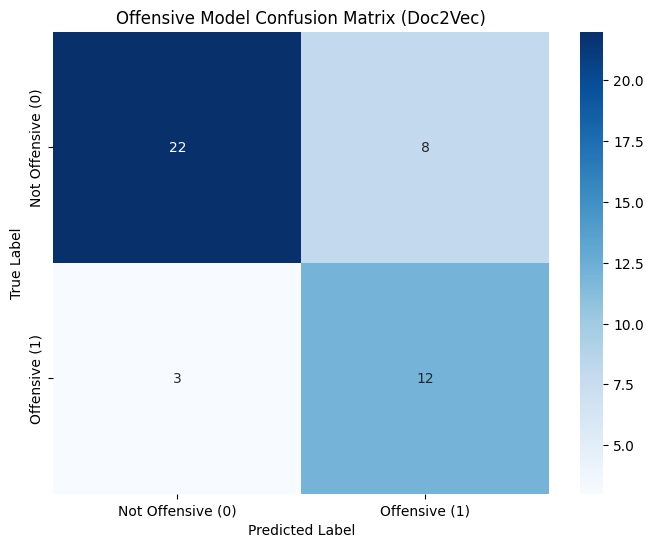

In [104]:
offensive_target_names = ['Not Offensive (0)', 'Offensive (1)']
plot_confusion_matrix(true_labels_offensive, 
                      preds_offensive, 
                      offensive_target_names, 
                      "Offensive Model Confusion Matrix (Doc2Vec)")

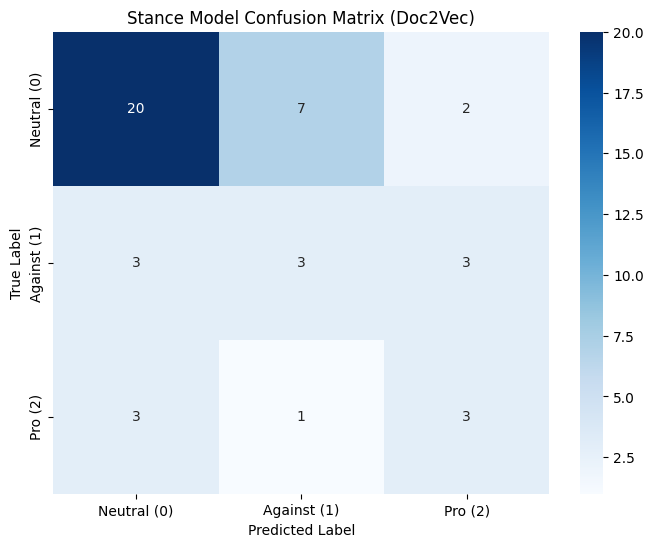

In [105]:
stance_target_names = ['Neutral (0)', 'Against (1)', 'Pro (2)']
plot_confusion_matrix(true_labels_stance, 
                      preds_stance, 
                      stance_target_names, 
                      "Stance Model Confusion Matrix (Doc2Vec)")

### Evaluation (neural network)

**Fill in** the code for evaluating/comparing with a neural network (transformers)

In [11]:
# TODO: code goes here

## That's all folks :)